Los modelos se pueden evaluar de más de una manera. No necesariamente se debe priorizar el número de aciertos, podemos enfocarnos en NO realizar predicciones erroneas, como no decir que un paciente está sano cuando en realidad está enfermo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import

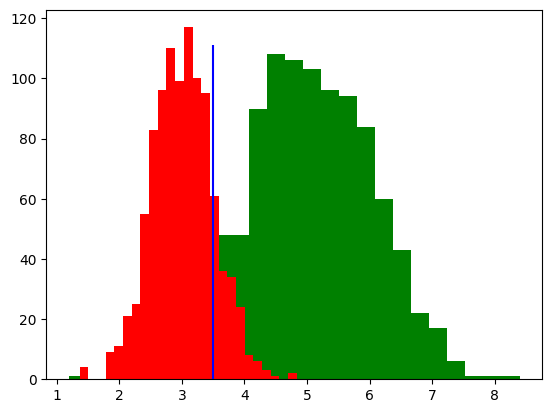

In [ ]:
media1=5
desv1=1
n=1000

media2=3
desv2=0.5
A=np.random.normal(media1,desv1,n)                  # Datos 1
Ac=np.ones(n)
B=np.random.normal(media2,desv2,n)                  # Datos 0
Bc=np.zeros(n)

frontier=3.5                                            # Frontera preliminar
VP=np.vectorize(lambda a: a > frontier)(A).sum()        # Verdadero positivo: predice 1 y es 1
FN=np.vectorize(lambda a: a < frontier)(A).sum()        # Falso negativo: predice 0 y es un 1
VN=np.vectorize(lambda b: b < frontier)(B).sum()        # Verdadero negativo: predice 0 y es 0
FP=np.vectorize(lambda b: b > frontier)(B).sum()        # Falso positivo: predice 1 y es 0

# Especificidad: Determina los 0 como 0
E=VN/(VN+FP)
# Sensibilidad: Determina los 1 como 1
S=VP/(VP+FN)
# Exactitud: Determina el numero de positivos total
Ex=(VP+VN)/(2*n)
# Precisión: Determina el numero de verdaderos predichos correctamente
P= VP/(VP+FP)

plt.hist(A,bins=25, color='green')
plt.hist(B,bins=25, color='red')
plt.vlines(frontier,0,n/9, color='blue')

<ipython-input-64-c888c996d54c>:17: RuntimeWarning: invalid value encountered in long_scalars
  P[i]  = VP/(VP+FP)


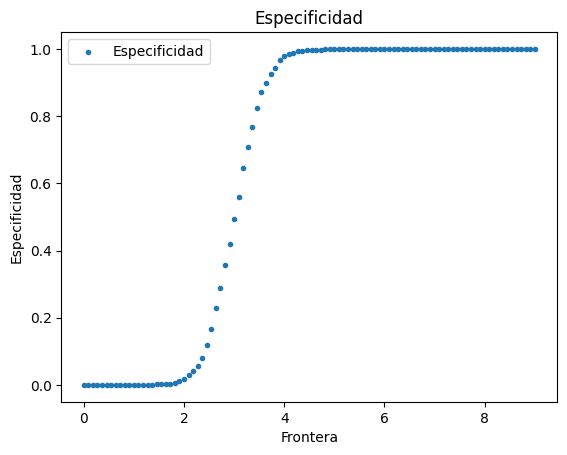

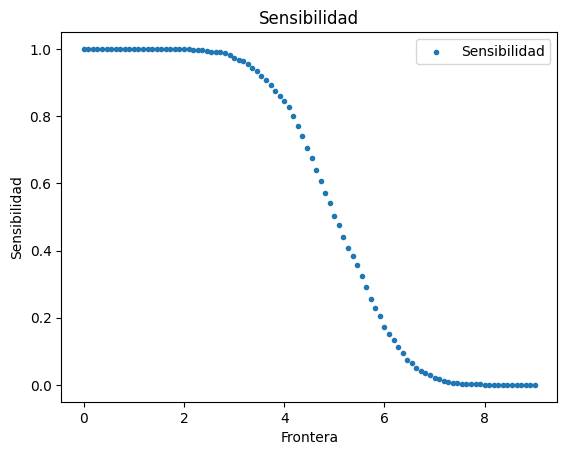

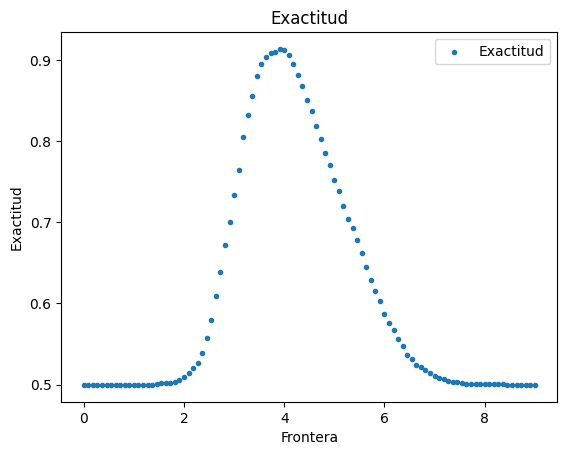

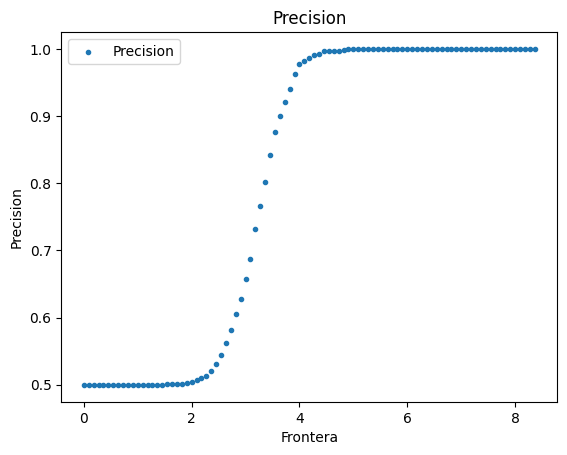

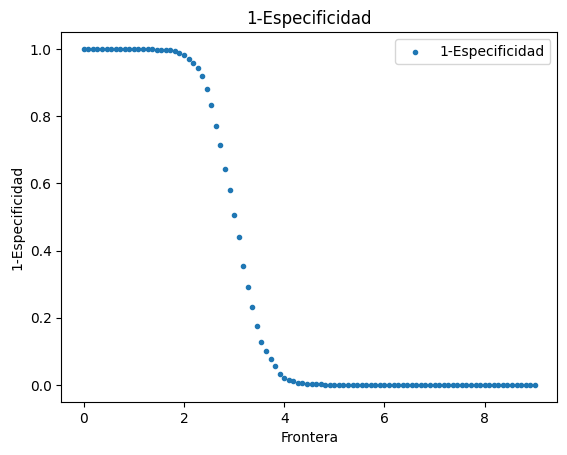

In [ ]:
front=np.linspace(0,9,100)                                # Variación de la frontera

Es=np.zeros(len(front))
S=np.zeros(len(front))
Ex=np.zeros(len(front))
P=np.zeros(len(front))

for i in np.arange(0, len(front), 1):
  VP = np.vectorize(lambda a: a > front[i])(A).sum()
  FN = np.vectorize(lambda a: a < front[i])(A).sum()
  VN = np.vectorize(lambda b: b < front[i])(B).sum()
  FP = np.vectorize(lambda b: b > front[i])(B).sum()

  Es[i] = VN/(VN+FP)
  S[i]  = VP/(VP+FN)
  Ex[i] = (VP+VN)/(2*n)
  P[i]  = VP/(VP+FP)

Caracteristica=['Especificidad','Sensibilidad', 'Exactitud', 'Precision','1-Especificidad']
ValorCarac=[Es,S,Ex,P,1-Es]

for i in np.arange(0,5,1):
  plt.scatter(front,ValorCarac[i], marker='.', label=Caracteristica[i])
  plt.title(Caracteristica[i])
  plt.xlabel('Frontera')
  plt.ylabel(Caracteristica[i])
  plt.legend()
  plt.show()

Text(0.5, 1.0, 'Curva ROC')

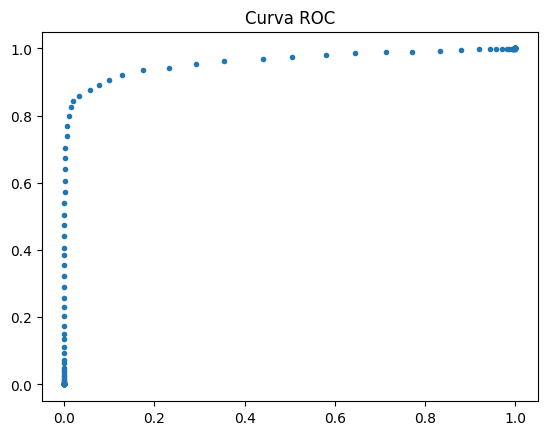

In [ ]:
plt.scatter(1-Es,S, marker='.')
plt.title('Curva ROC')

In [ ]:
D=np.sqrt((0-(1-Es))**2 + (1-S)**2)
p=D.argmin()
MejorFrontera=front[p]                          # Optimiza la sensibilidad y la 1-Especificidad a la vez
MejorFrontera

3.7272727272727275